In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
df  = pd.read_csv('emails.csv')
df

,Spam,Message
0,0,Please call me at 8
1,1,Free money is available for you
2,0,I study he studies they are students I studied...
3,1,I am working at office now to 9 evening
4,0,U dun say so early hor... U c already then say...
...,...,...
5222,0,"It‘s reassuring, in this crazy world."
5223,0,Oh... Okie lor...We go on sat...
5224,1,You are awarded a SiPix Digital Camera! call 0...
5225,0,"Hey chief, can you give me a bell when you get..."


In [3]:
# pip install nltk

In [4]:
import nltk 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Add this line to download punkt_tab

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
text= "Hi: You don't working on smap classification !"
tokens = word_tokenize(text.lower())
tokens


['hi', ':', 'you', 'do', "n't", 'working', 'on', 'smap', 'classification', '!']

In [6]:
import string 

tokens =  [token for token in tokens if token not in string.punctuation and "'" not in token]

In [7]:
tokens

['hi', 'you', 'do', 'working', 'on', 'smap', 'classification']

In [8]:
stop_words = stopwords.words('english')
tokens = [token for token in tokens if token not in stop_words]
tokens

['hi', 'working', 'smap', 'classification']

In [9]:
# stop_words

In [10]:
stemmer = PorterStemmer()
tokens = [stemmer.stem(token) for token in tokens ]
tokens

['hi', 'work', 'smap', 'classif']

In [30]:
import re ## regexprression 


def preprocessing_text_v2(data):
    # 1. Lowercasing
    text = data.lower()

    # 2. Handle URLs, emails, numbers with generic tokens
    # Using re.sub with compiled patterns can be slightly more efficient for repeated calls
    # but for a single function call, direct re.sub is fine.
    # text = re.sub(r'http\S+|www\S+|https\S+', ' url ', text) # Replace URLs
    # text = re.sub(r'\S*@\S*\s?', ' email ', text) # Replace emails
    # text = re.sub(r'\d+', ' number ', text)# re.sub(r'\d+', ' number ', text) # Replace digits
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text) # Replace URLs
    text = re.sub(r'\S*@\S*\s?', ' ', text) # Replace emails
    text = re.sub(r'\d+', ' ', text)# re.sub(r'\d+', ' number ', text) # Replace digits
    # 3. Tokenization - IMPORTANT: Tokenize the 'text' AFTER regex substitutions
    tokens = word_tokenize(text)

    # 4. Remove punctuation and tokens containing apostrophes (like "n't")
    # You might want to refine this for contractions (e.g., expand "don't" to "do not" BEFORE this step)
    tokens = [token for token in tokens if token not in string.punctuation and "'" not in token]

    # 5. Remove stopwords
    stop_words = set(stopwords.words('english')) # Convert to set for faster lookup
    tokens = [token for token in tokens if token not in stop_words]

    # 6. Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # 7. Join tokens back into a single string for vectorization
    preprocessed_text = ' '.join(tokens)

    # 8. Clean up extra spaces (if any were created by substitutions/removals)
    preprocessed_text = re.sub(r'\s+', ' ', preprocessed_text).strip()

    return preprocessed_text

In [31]:
email = "Hello! These are 5678 examples musta@tah.com of emails for spam classification. "

preprocessed_email =preprocessing_text_v2(email)
print(preprocessed_email)

hello exampl email spam classif


In [32]:
df['process_message'] = df['Message'].apply( lambda x : preprocessing_text_v2(x))

In [33]:
df

,Spam,Message,process_message
0,0,Please call me at 8,pleas call
1,1,Free money is available for you,free money avail
2,0,I study he studies they are students I studied...,studi studi student studi yesterday
3,1,I am working at office now to 9 evening,work offic even
4,0,U dun say so early hor... U c already then say...,u dun say earli hor ... u c alreadi say ...
...,...,...,...
5222,0,"It‘s reassuring, in this crazy world.",‘ reassur crazi world
5223,0,Oh... Okie lor...We go on sat...,oh ... oki lor ... go sat ...
5224,1,You are awarded a SiPix Digital Camera! call 0...,award sipix digit camera call landlin deliveri...
5225,0,"Hey chief, can you give me a bell when you get...",hey chief give bell get need talk royal visit ...


In [34]:
df_spam = df[ df['Spam']==1 ]
df_not_spam = df[ df['Spam']==1 ]

([<matplotlib.patches.Wedge at 0x282c8fdd400>,
 [Text(-1.010710580142957, 0.4341245480125346, 'Spam'),
  Text(1.0107106004657929, -0.4341245006977568, 'Not Spam')])

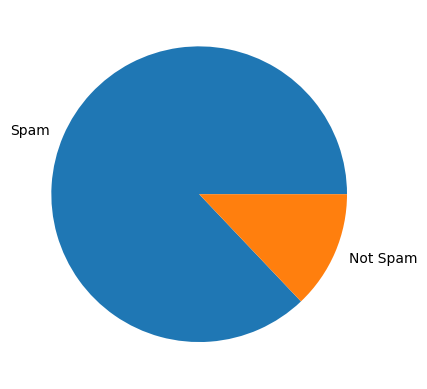

In [35]:
counts = df['Spam'].value_counts()
plt.pie(counts.values,labels=['Spam','Not Spam'])

In [36]:
# pip install wordcloud 


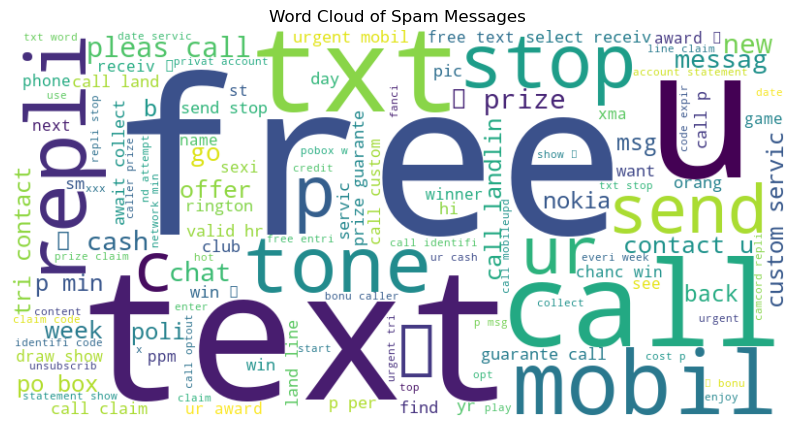

In [37]:
from wordcloud import WordCloud

# spam_workd_list = df_smap['process_message'].astype(str)
# spam_wordcloud = WordCloud(width=500,height=300).generate(spam_workd_list)

# plt.figure(figsize=(10,7))
# plt.imshow(spam_wordcloud)
# plt.show()

all_spam_words = ' '.join(df_spam['process_message'])
# Generate the word cloud
spam_wordcloud = WordCloud(
    width=800, # Increased width for better visualization
    height=400, # Increased height
    background_color='white', # Common for better contrast
    min_font_size=10
).generate(all_spam_words)

# Display the word cloud
plt.figure(figsize=(10, 7)) # Adjusted figure size if needed
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off') # Hide axes for cleaner look
plt.title('Word Cloud of Spam Messages') # Add a title
plt.show()


In [40]:
from sklearn.feature_extraction.text import CountVectorizer 

documents = [
    "My cat and dog sat on the mat",
    "strange cat jumped over the mat",
    "His cat ate the mouse ran across the mat",
    "Her dog run after my cat and mouse",
]

max_features=9

count_vectorizer = CountVectorizer(max_features=max_features)

vectors = count_vectorizer.fit_transform(documents)

print(vectors)

  (0, 7)	1
  (0, 3)	1
  (0, 1)	1
  (0, 4)	1
  (0, 8)	1
  (0, 5)	1
  (1, 3)	1
  (1, 8)	1
  (1, 5)	1
  (2, 3)	1
  (2, 8)	2
  (2, 5)	1
  (2, 2)	1
  (2, 6)	1
  (3, 7)	1
  (3, 3)	1
  (3, 1)	1
  (3, 4)	1
  (3, 6)	1
  (3, 0)	1


In [41]:
feature_names = count_vectorizer.get_feature_names_out()

print("Feature Names:")
print(feature_names)

Feature Names:
['after' 'and' 'ate' 'cat' 'dog' 'mat' 'mouse' 'my' 'the']


In [42]:
print(vectors.toarray())

[[0 1 0 1 1 1 0 1 1]
 [0 0 0 1 0 1 0 0 1]
 [0 0 1 1 0 1 1 0 2]
 [1 1 0 1 1 0 1 1 0]]


In [43]:
example_df = pd.DataFrame(data=vectors.toarray(),columns=feature_names)

example_df

,after,and,ate,cat,dog,mat,mouse,my,the
0,0,1,0,1,1,1,0,1,1
1,0,0,0,1,0,1,0,0,1
2,0,0,1,1,0,1,1,0,2
3,1,1,0,1,1,0,1,1,0


In [46]:
frequencies = vectors.toarray().sum(axis=0)

sorted_indices = frequencies.argsort()[::-1]
sorted_feature_names = [feature_names[idx] for idx in sorted_indices]
sorted_frequencies = frequencies[sorted_indices]


for i in range(len(sorted_feature_names)):
    print(sorted_feature_names[i], ": ", sorted_frequencies[i])

the :  4
cat :  4
mat :  3
my :  2
mouse :  2
dog :  2
and :  2
ate :  1
after :  1


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
tfidf_vectors = tfidf_vectorizer.fit_transform(documents)

print("\nTF-IDF Vectorization:")

feature_names=tfidf_vectorizer.get_feature_names_out()

example_df = pd.DataFrame(data=tfidf_vectors.toarray(),columns=feature_names)
example_df


TF-IDF Vectorization:


,after,and,ate,cat,dog,mat,mouse,my,the
0,0.000000,0.458882,0.000000,0.303729,0.458882,0.371504,0.000000,0.458882,0.371504
1,0.000000,0.000000,0.000000,0.500491,0.000000,0.612172,0.000000,0.000000,0.612172
2,0.000000,0.000000,0.504371,0.263202,0.000000,0.321934,0.397652,0.000000,0.643868
3,0.515801,0.406663,0.000000,0.269166,0.406663,0.000000,0.406663,0.406663,0.000000


In [48]:


corpus = df['process_message']

max_features = 100 

count_vectorizer = CountVectorizer(max_features=max_features) 
vectories = count_vectorizer.fit_transform(corpus)
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
tfidf_vectors = tfidf_vectorizer.fit_transform(corpus)



In [56]:
X = vectories.toarray() # This is the crucial step
y = df['Spam']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=.8,random_state=42)

In [57]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.losses import BinaryCrossentropy
model = Sequential()

# Input Layer:
# x_train.shape[1] gives the number of features (e.g., number of unique words if using TF-IDF)
# The input_shape argument expects a tuple, so (x_train.shape[1],)
model.add(Dense(64, input_shape=(x_train.shape[1],), activation="relu"))

# Hidden Layers:
model.add(Dense(32, activation='relu'))

# Output Layer:
# For binary classification, 1 neuron with 'sigmoid' activation is standard.
# Sigmoid outputs a probability between 0 and 1.
model.add(Dense(1, activation='sigmoid'))

# Compile the model:
# Use the correct spelling: compile, optimizer, metrics
# It's good practice to import optimizers like Adam for clarity, though 'adam' string works.
model.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])

# Train the model:
# You might want to add 'epochs' and 'batch_size' for better control over training.
# Also, 'validation_data' is crucial for monitoring overfitting.
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7518 - loss: 0.5446
Epoch 2/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9487 - loss: 0.1668
Epoch 3/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9617 - loss: 0.1044
Epoch 4/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9604 - loss: 0.1169
Epoch 5/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9590 - loss: 0.1179
Epoch 6/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9662 - loss: 0.0965
Epoch 7/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9693 - loss: 0.0951
Epoch 8/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9753 - loss: 0.0784
Epoch 9/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9753 - loss: 0.0776
Epoch 10/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9739 - loss: 0.0778
Epoch 11/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9779 - loss: 0.0677
Epoch 12/100
131/131 ━━━━━━━━━━━━━━━━━━━━

In [58]:
model.evaluate(x_test,y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9581 - loss: 0.1821


[0.1655941605567932, 0.9684512615203857]

In [59]:
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [61]:
from sklearn.metrics import classification_report 
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       949
         1.0       0.79      0.90      0.84        97

    accuracy                           0.97      1046
   macro avg       0.89      0.94      0.91      1046
weighted avg       0.97      0.97      0.97      1046



In [62]:
X = tfidf_vectors.toarray() # This is the crucial step
y = df['Spam']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=.8,random_state=42)

In [63]:
model = Sequential()

# Input Layer:
# x_train.shape[1] gives the number of features (e.g., number of unique words if using TF-IDF)
# The input_shape argument expects a tuple, so (x_train.shape[1],)
model.add(Dense(64, input_shape=(x_train.shape[1],), activation="relu"))

# Hidden Layers:
model.add(Dense(32, activation='relu'))

# Output Layer:
# For binary classification, 1 neuron with 'sigmoid' activation is standard.
# Sigmoid outputs a probability between 0 and 1.
model.add(Dense(1, activation='sigmoid'))

# Compile the model:
# Use the correct spelling: compile, optimizer, metrics
# It's good practice to import optimizers like Adam for clarity, though 'adam' string works.
model.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])

# Train the model:
# You might want to add 'epochs' and 'batch_size' for better control over training.
# Also, 'validation_data' is crucial for monitoring overfitting.
model.fit(x_train, y_train, epochs=100)

Epoch 1/100


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7910 - loss: 0.5529
Epoch 2/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9140 - loss: 0.1948
Epoch 3/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9528 - loss: 0.1401
Epoch 4/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9582 - loss: 0.1213
Epoch 5/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9608 - loss: 0.1170
Epoch 6/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9699 - loss: 0.0947
Epoch 7/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9685 - loss: 0.0925
Epoch 8/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9680 - loss: 0.0997
Epoch 9/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9703 - loss: 0.0879
Epoch 10/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9687 - loss: 0.0871
Epoch 11/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9753 - loss: 0.0814
Epoch 12/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [64]:
model.evaluate(x_test,y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9662 - loss: 0.1401


[0.1414365917444229, 0.9674952030181885]

In [65]:
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [66]:
from sklearn.metrics import classification_report 
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       936
         1.0       0.85      0.85      0.85       110

    accuracy                           0.97      1046
   macro avg       0.91      0.91      0.91      1046
weighted avg       0.97      0.97      0.97      1046

